# California House Price Prediction

### Import neccessary library


In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
from sklearn.datasets import fetch_california_housing

### Read Dataset


In [191]:
dataset = fetch_california_housing()

In [192]:
type(dataset)

sklearn.utils._bunch.Bunch

In [193]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [194]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [195]:
dataset.target_names

['MedHouseVal']

In [196]:
dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [197]:
dataframe['Target'] = dataset.target

### sanity check of data

In [198]:
dataframe.shape

(20640, 9)

In [199]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [200]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [201]:
# find missing values
dataframe.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [202]:
# finding duplicates
dataframe.duplicated().sum()

np.int64(0)

### EDA

In [203]:
# descriptive statistics
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [204]:
# TO ignore the Warnings
import warnings
warnings.filterwarnings("ignore")

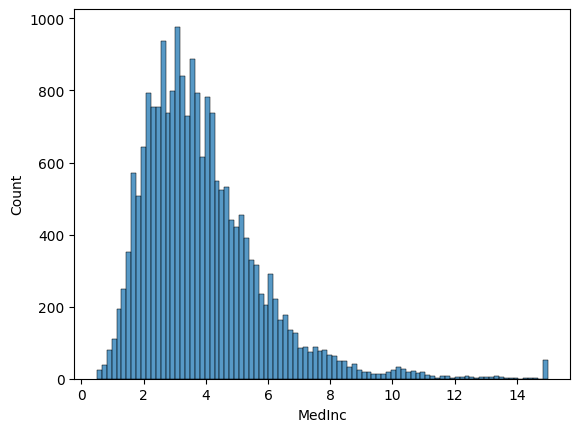

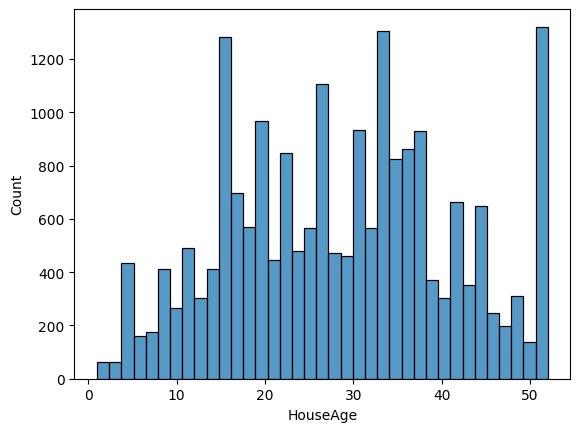

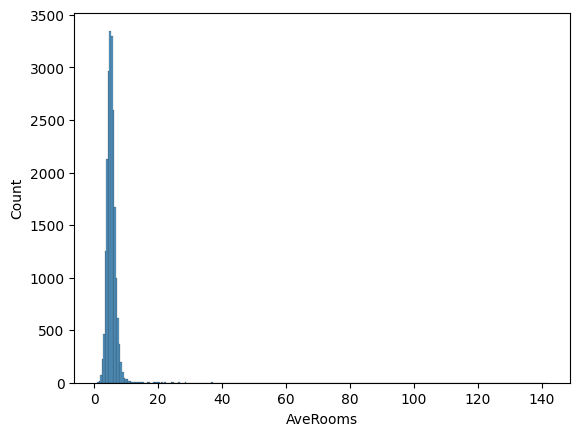

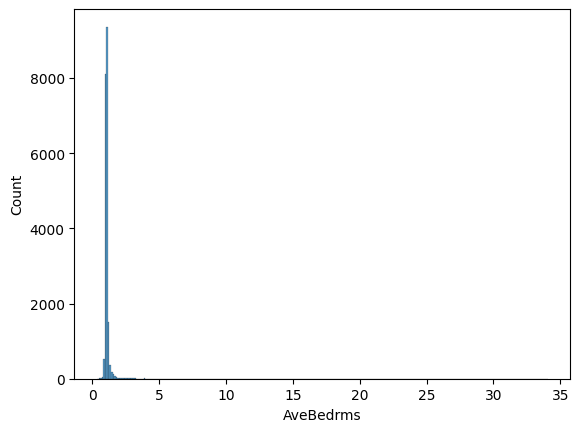

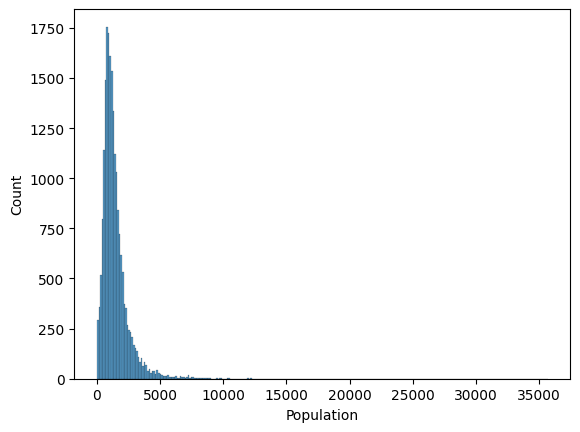

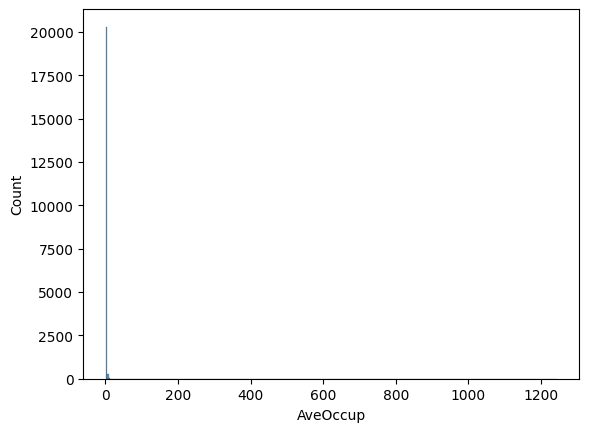

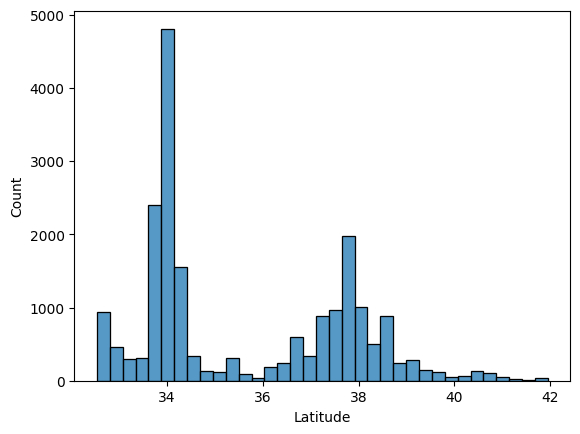

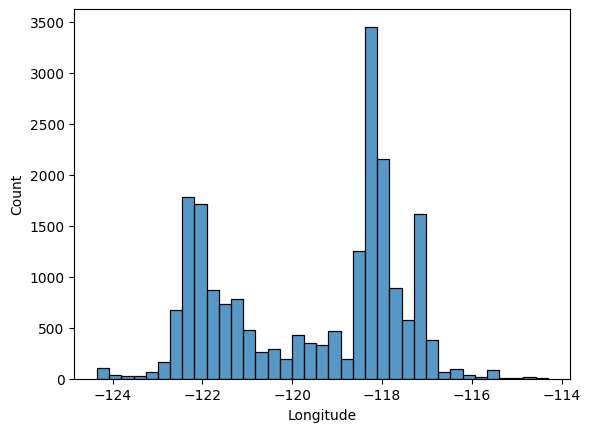

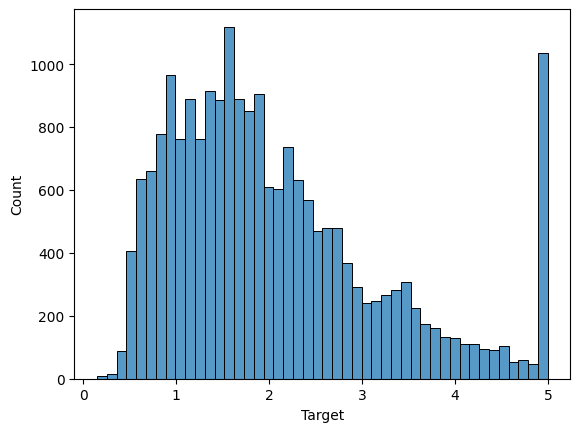

In [205]:
# histogram to understand distribution
for i in dataframe.select_dtypes(include="number").columns:
    sns.histplot(data=dataframe, x=i)
    plt.show()

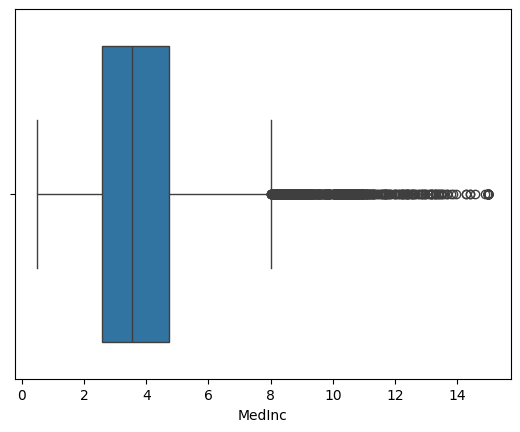

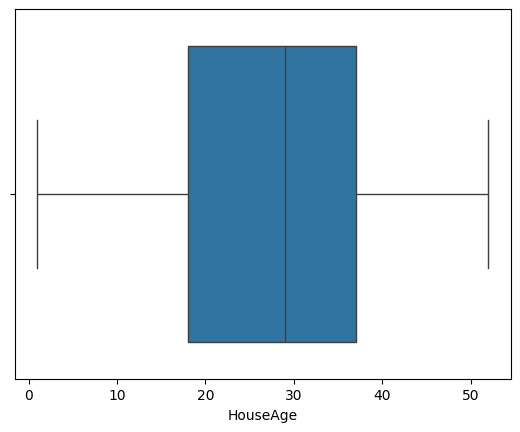

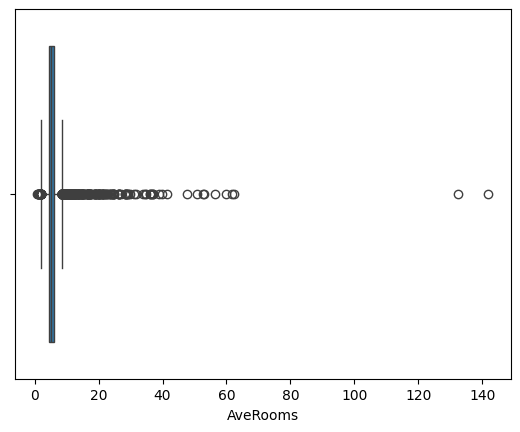

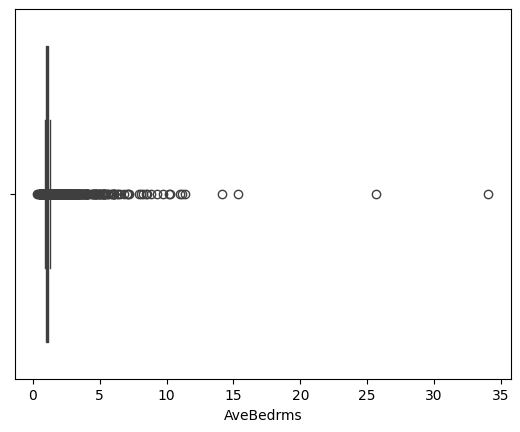

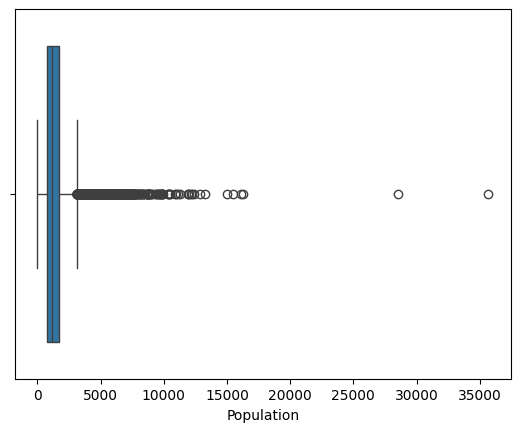

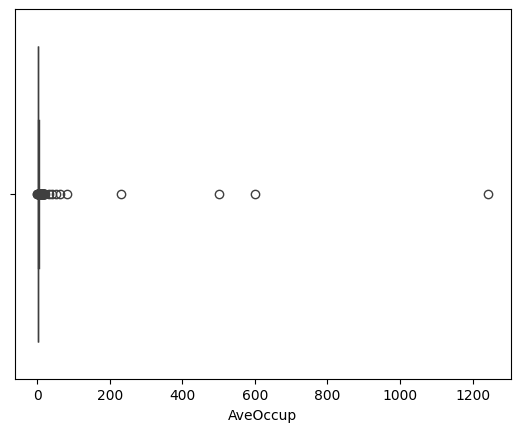

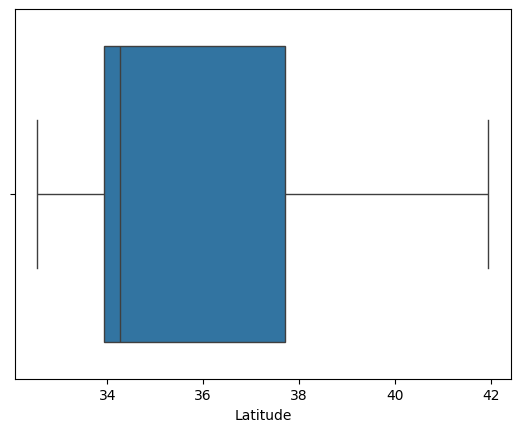

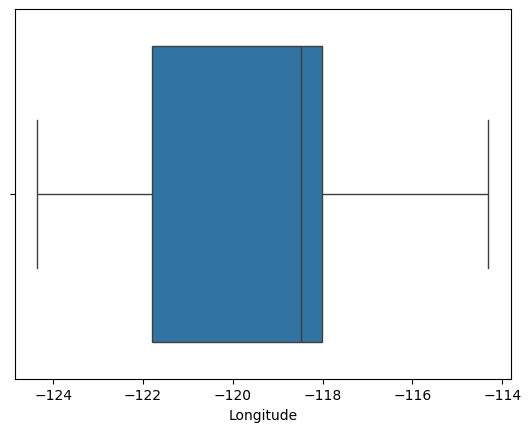

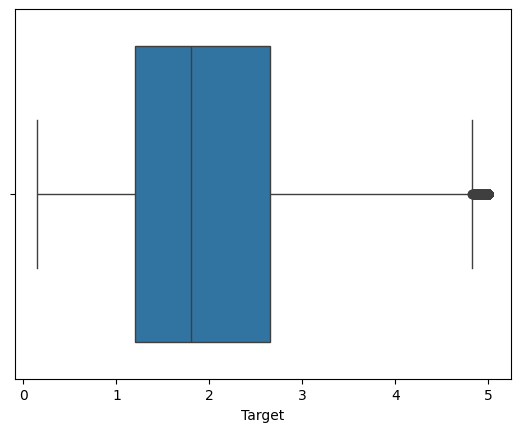

In [174]:
# Boxplot to identify Outliers
for i in dataframe.select_dtypes(include="number").columns:
    sns.boxplot(data=dataframe, x=i)
    plt.show()

In [175]:
features = dataset.feature_names
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [176]:
dataframe.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

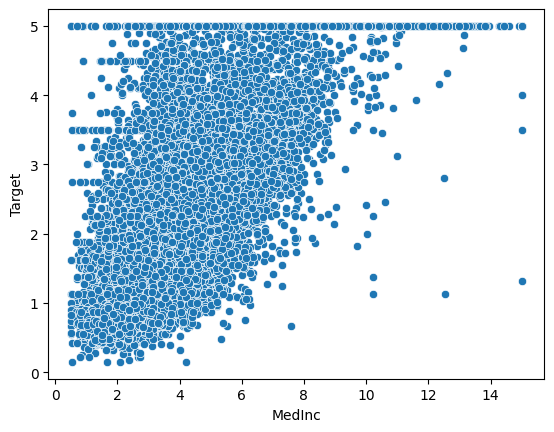

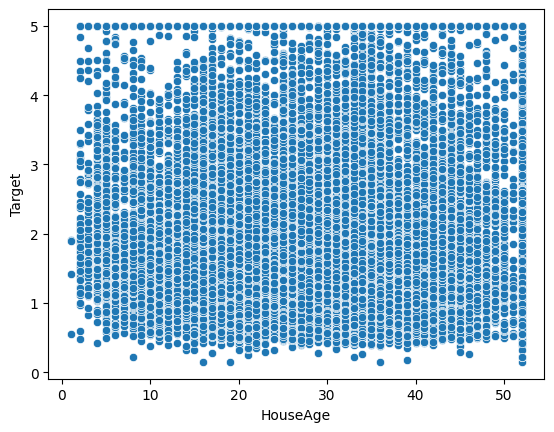

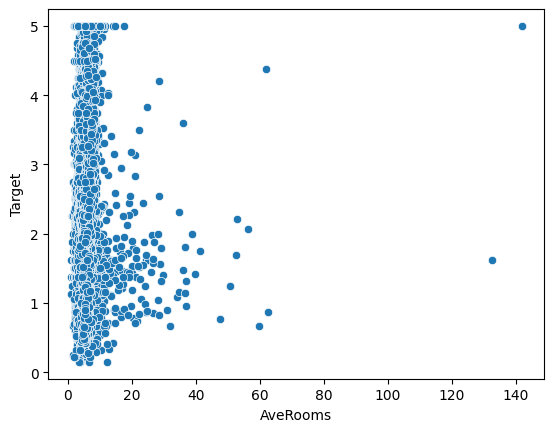

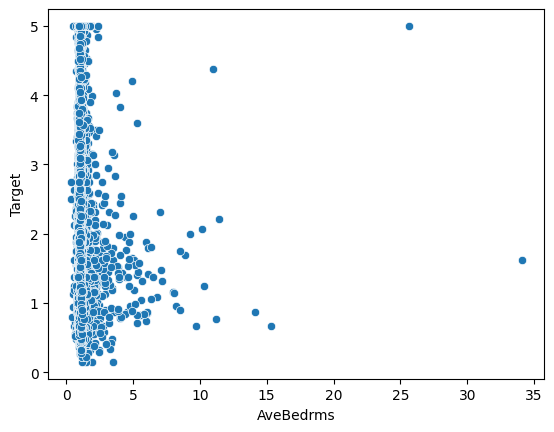

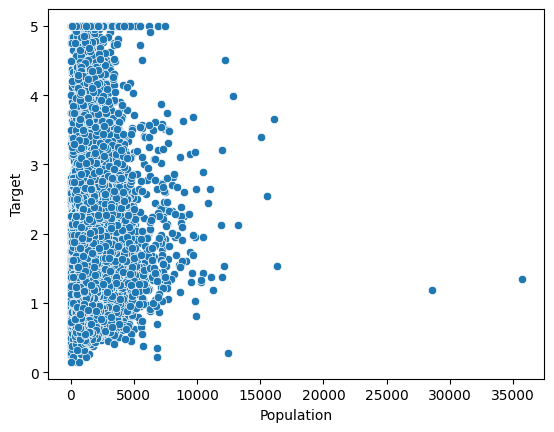

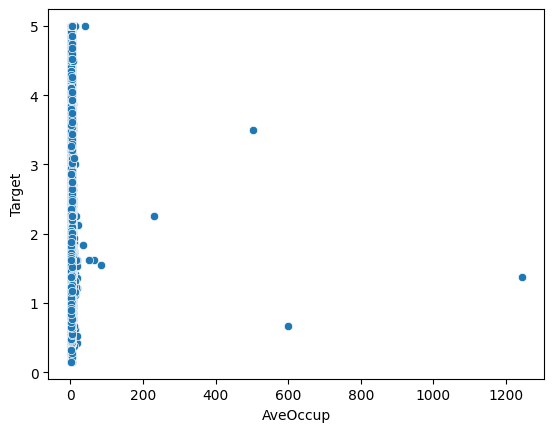

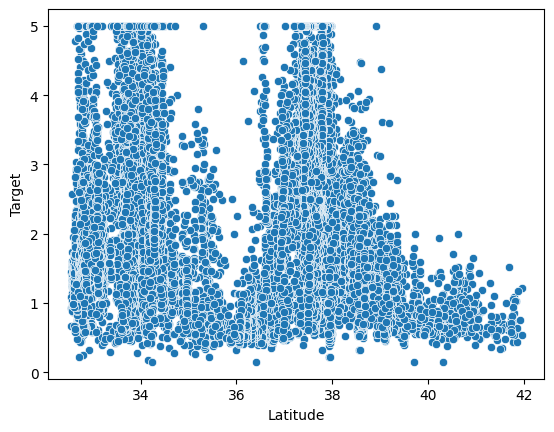

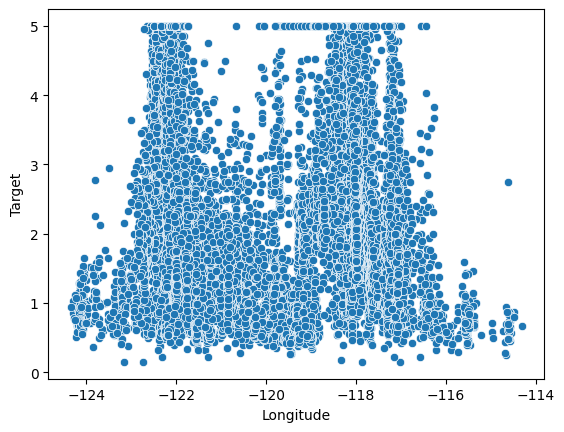

In [177]:
for i in features:
    sns.scatterplot(data=dataframe ,x = i, y= 'Target')
    plt.show()

In [178]:
# Correlation with heatmap to interpret the relation and multicoliniarity
data_cor = dataframe.select_dtypes(include="number").corr()

<Axes: >

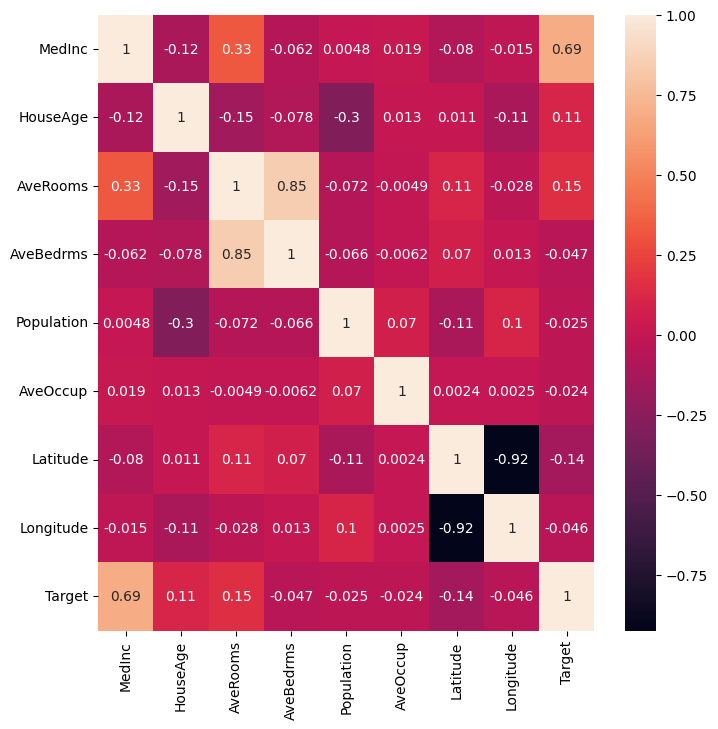

In [179]:
plt.figure(figsize=(8,8))
sns.heatmap(data=data_cor,annot=True)

### Train Test Split

In [206]:
X = dataframe.iloc[:,:-1]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [207]:
y = dataframe.iloc[:,-1]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [209]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [210]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


### Scale the data

In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Training

### Linear Regression

In [221]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)


In [222]:
score

0.5757877060324508

In [225]:
y_predict = model.predict(X_test_scaled)

### Model Evaluation

In [226]:
residuals = y_test-y_predict
residuals

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
           ...   
15362    0.641254
16623    0.418161
18086    0.531240
2144    -0.464511
3665    -0.494403
Name: Target, Length: 4128, dtype: float64

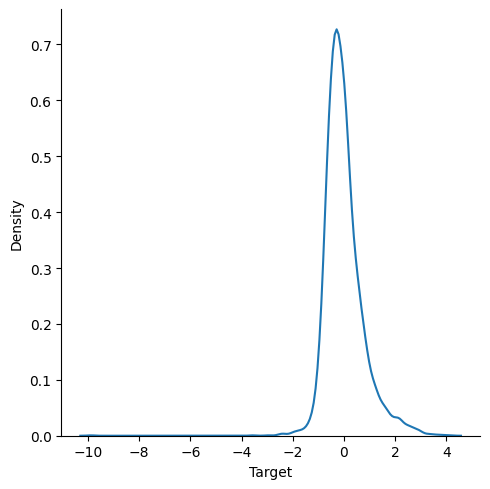

In [227]:
sns.displot(residuals, kind = 'kde')

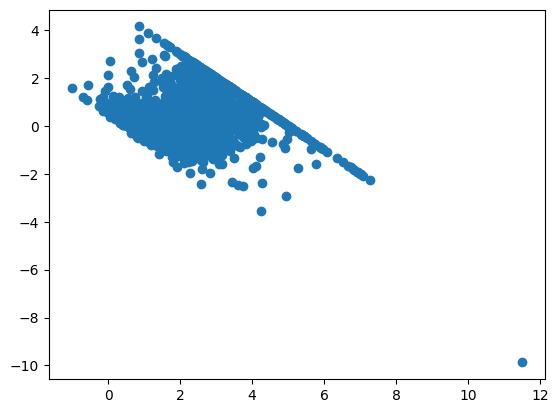

In [228]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_predict, residuals)

In [219]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [230]:
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(r2_score(y_test, y_predict))


0.5558915986952444
0.5332001304956565
0.5757877060324508


In [237]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=20.0)
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_test_scaled, y_test))


0.5763144025318908


## New Data Prediction

In [238]:
dataset.data[12]

array([ 3.07500000e+00,  5.20000000e+01,  5.32264957e+00,  1.01282051e+00,
        1.09800000e+03,  2.34615385e+00,  3.78500000e+01, -1.22260000e+02])

In [239]:
scaler.transform(dataset.data[12].reshape(1,-1))

array([[-0.42313776,  1.85617335, -0.04716011, -0.19359178, -0.2888713 ,
        -0.06484555,  1.03287942, -1.33512123]])

In [240]:
ridge.predict(scaler.transform(dataset.data[12].reshape(1,-1)))

array([2.12351365])

## Pickling the Model file for Deployment

In [85]:
import pickle

In [241]:
pickle.dump(ridge,open('ridge_model.pkl','wb'))

In [242]:
pickled_model = pickle.load(open('ridge_model.pkl','rb'))

In [243]:
pickled_model.predict(scaler.transform(dataset.data[12].reshape(1,-1)))

array([2.12351365])

In [90]:
pickle.dump(scaler,open('scaling1.pkl','wb'))